In [137]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [138]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Cross-plot temperature versus depth with values from the MVP logger
--

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**Data files**

In [140]:
mvpfile = 'Table1.csv'
dtstart = '2018-05-07T05:50:00'

**Read data**

In [141]:
#MVP
df = pd.read_csv(mvpfile, parse_dates=True, index_col = 'Datetime')
#Use only data after logger was installed
mvp = df[df.index>=dtstart]

In [142]:
mvp.tail()

,RecNbr,LoggerName,SupplyVolts,LithiumVolts,PTemp_degC,Temp_PRT_degC,Depth_USGS_OTT_meters,nmbr_satellites_Avg
Datetime,,,,,,,,
2018-06-05 23:10:00,4279,Inferno,12.76,3.676,10.41,38.000000,3.872,7.5
2018-06-05 23:20:00,4280,Inferno,12.76,3.676,10.51,38.020000,3.873,8.0
2018-06-05 23:30:00,4281,Inferno,12.76,3.675,10.62,38.040001,3.876,8.0
2018-06-05 23:40:00,4282,Inferno,12.76,3.677,10.73,38.070000,3.876,8.0
2018-06-05 23:50:00,4283,Inferno,12.74,3.671,10.86,38.080002,3.879,8.0


**Cross-plot**

In [143]:
colors = np.arange(mvp.shape[0])

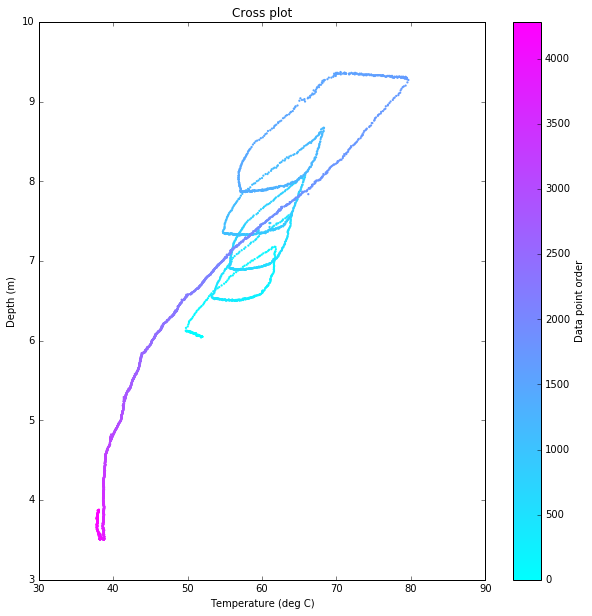

In [144]:
fig = plt.figure(figsize=(10,10))
plt.scatter(mvp['Temp_PRT_degC'], mvp['Depth_USGS_OTT_meters'], c=colors, edgecolors='None', s=5, cmap='cool')
plt.colorbar(label='Data point order')

plt.title('Cross plot')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Depth (m)')

In [145]:
fig.savefig('cross_plot.png', dpi=100)

**Time-series plot**

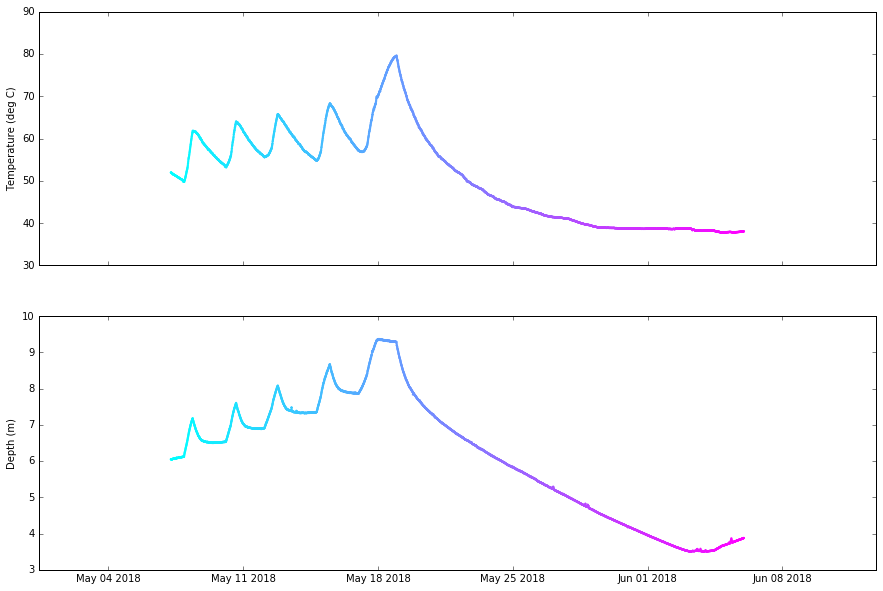

In [146]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15,10))

ax1.scatter(mvp.index, mvp['Temp_PRT_degC'], c=colors, edgecolors='None', s=5, cmap='cool')
ax1.set_ylabel('Temperature (deg C)')

ax2.scatter(mvp.index, mvp['Depth_USGS_OTT_meters'], c=colors, edgecolors='None', s=5, cmap='cool')
ax2.set_ylabel('Depth (m)')

In [147]:
fig.savefig('cross_plot_time-series.png', dpi=100)